# Exam 21th of August 2025, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Good luck!

In [62]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


This problem is about SVD and anomaly detection. In all the problems where you are asked to produce a matrix or vector, they should be **numpy arrays**. 

1. [4p] Load the file `data/SVD.csv` as instructed in the code cell. Compute the Singular Value Decomposition, i.e. construct the three matrices $U$, $D$, $V$ such that if $X$ is the data matrix of shape `n_samples x n_dimensions` then $X = UDV^T$. Put the resulting matrices in their variables, check that the shapes align with the instructions in the code cell. Finally, extract the first right and left singular vectors and store those as 1-d arrays in the instructed variables. **Hint: make sure that the first right and left singular vectors are correct by using the matrix, also be careful about the shape!!**
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition. Calculate the explained variance of using $1$, $2$,... number of singular vectors and select the smallest number of singular vectors that is needed in order to explain at least $90\%$ of the variance.
3. [3p] With the number of components chosen in part 2, construct the best approximating matrix with the rank as the number of components. Explain geometrically what each row represents in the approximating matrix in terms of the original data, write your answer as free text in the Markdown cell below as instructed in the cells.
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the original matrix `problem1_data`and the approximating matrix `problem1_approximation` and plot the empirical distribution function of that distance. Based on the empirical distribution function choose a threshold such that 10 samples are above it and the rest below. Store the 10 samples in the instructed variable.

In [65]:
# Part 1: 4 points

# Load the data from the file data/SVD.csv and store the data in a numpy array called problem1_data below
# Double check that the numbers have been parsed correctly by checking the dtype of the array by calling problem1_data.dtype
import pandas as pd
import numpy as np
df_train = pd.read_csv("data/SVD.csv", sep=",")

problem1_data = df_train.to_numpy() # A numpy array of shape n_samples x n_dimensions
#problem1_data is X

    
#the columns of U
# in such a decomposition are called left singular vectors of A
#, and the columns of V
# are called right singular vectors of A

U,D,VT = np.linalg.svd(problem1_data,full_matrices=False)

    
problem1_U = U # The matrix of left singular vectors of problem1_data with shape n_samples x n_dimensions
problem1_D = D # The vector of singular values of problem1_data with shape n_dimensions
problem1_V = VT # The matrix of right singular vectors of problem1_data with shape n_dimensions x n_dimensions

# The first right singular vector of problem1_data with shape (n_dimensions,) hint sometimes one needs to invoke flatten() to avoid having shape (n_dimensions, 1) or (1, n_dimensions)
rizzler = problem1_V[:,:1]
problem1_first_right_singular_vector = rizzler.flatten()

# The first left singular vector of problem1_data with shape (n_samples,) hint sometimes one needs to invoke flatten() to avoid having shape (n_samples, 1) or (1, n_samples)
grizzler = problem1_U[:,:1]
problem1_first_left_singular_vector = grizzler.flatten()


In [66]:
import numpy as np

class PCA(object):

    def __init__(self,n_components):
        self.n_components =  n_components
        self.components=None
        self.singular_values=None
        self.dimension=None
        self.mean=None

    def fit(self,X):
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(min(X.shape[1],X.shape[0]) >= self.n_components), "min(X.shape[1],X.shape[0]) >= self.n_components!"
        #print("Number of data_points: %d, number of features: %d, Number of components: %d" %(X.shape[0],X.shape[1],self.n_components))
        
        X = self._center(X) # Make sure the data is centered (each feature has empirical mean zero)
        self.dimension=X.shape[1] # This is the dimension of the data
        self.components,self.singular_values = self._compute(X) # Compute the singular vectors
        
    def _center(self,X):
        self.mean = np.mean(X,axis=0).reshape(1,-1)
        return X-self.mean
        
    def transform(self,X):
        if (type(self.components) == None):
            raise Exception("Not fitted yet!")
        
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(X.shape[1] == self.dimension), "Incorrect number of features!"
        
        return (X-self.mean)@self.components
    
    def inverse_transform(self,X):
        if (type(self.components) == None):
            raise Exception("Not fitted yet!")
        
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(X.shape[1] == self.n_components), "Incorrect number of features!"
        
        return X@self.components.T+self.mean
    
    def project(self,X):
        return self.inverse_transform(self.transform(X))
        
    def _compute(self,X):
        U,D,VT = np.linalg.svd(X,full_matrices=False)
        return (VT.T)[:,:self.n_components],D
    
    def get_components(self):
        return self.components
    def get_dimension(self):
        return self.dimension

In [67]:
# Part 2: 3 points

# Calculate the explained variance of using 1,2,3,...,n_dimensions singular values and store it as a numpy array called problem1_explained_variance below
for k in range(231):
    pca = PCA(k)
    pca.fit(problem1_data)
    variances = pca.singular_values**2/(problem1_data.shape[0]-1)
    explained_variance = np.cumsum(variances/np.sum(variances))
result = explained_variance    


# A numpy array of shape (n_dimensions,), it should be an increasing sequence of positive numbers and the last element should be 1
problem1_explained_variance = np.array(result)

# Store in the variable below the smallest number of singular values needed to explain at least 90% of the variance
problem1_num_components = 13 # An integer

In [77]:
# Part 3: 3 points

# Calculate the approximating matrix of problem1_data using the first problem1_num_components singular values and store it in the variable below
# 
pca_thing = PCA(problem1_num_components)
pca_thing.fit(problem1_data)

# A numpy array of shape n_samples x n_dimensions
#problem1_approximation = pca.inverse_transform(pca.transform(problem1_data))
rizz = pca.transform(problem1_data)
#rizz.to_numpy()
problem1_approximation = rizz # pca._compute(problem1_data)
#print(type(problem1_approximation))


## Free text answer

Put the explanation for **part 3** of the rows of the approximating matrix below this line in this cell. In order to enter edit mode you can doubleclick this cell or select it and just press enter.
 
You approximate the matrix by using the dimensions that matter the most. Geometrically, the data changes "shape" to fit the new dimensions, trading simplicity for accuracy. The rows represent the same samples as previous but expressed in the lower dimension k.

PCA essentially rotates the set of points around their mean in order to align with the principal components.


In [78]:
# Part 4: 4 points


dist = np.linalg.norm(problem1_data-problem1_approximation)

# Calculate the reconstruction error of problem1_data using problem1_approximation and store it in the variable below (should have shape (n_samples,)) (row wise Euclidean distance)
problem1_reconstruction_error = dist

# Put the code below to plot the empirical distribution function of the reconstruction error
# something is wrong with the transform. i believe its supposed to approximate the data, represented by matrix problem1_data. 
# inverse_transform(transform) gives EDF as just a point in origin.
# doing transform by itself, it takes away 1 dimension, so calculating the norm doesnt work because of shape mismatch. so i dont know. 

from Utils import makeEDF
from Utils import plotEDF
plotEDF(makeEDF(problem1_reconstruction_error))


# Store the value of the selected threshold in the variable below
problem1_threshold = 0

# Finally store the samples of problem1_data that have a reconstruction error larger than problem1_threshold in the variable below, should have shape (10, n_dimensions)
#problem1_outliers = XXX

ValueError: operands could not be broadcast together with shapes (2326,231) (2326,230) 

---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given the data-science job salaries dataset found in `data/salaries.csv`, which contains the salaries of jobs, their experience level and how much of the working hours are remote. Your task is to train a `linear regression` model to predict the salary of a job based on its attributes:
* `work_year`, The year the salary was paid.
* `experience_level`, The experience level in the job during the year with the following possible values: 0 Entry-level / Junior 1 Mid-level / Intermediate 2 Senior-level / Expert 3 Executive-level
* `employment_type`, The type of employement for the role: Part-time, Full-time, Contract, Freelance
* `salary_in_usd`, The total gross salary amount paid in US Dollars.
* `remote_ratio`, The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute relative error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 99% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]
$$
    \text{Absolute relative error} = \left |\frac{\text{true-predicted}}{\text{true}} \right |
$$  
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute relative error good/bad and what do you think about the scatter plot in point 5? [3p]


In [103]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/salaries.csv
import pandas as pd
import numpy as np
problem2_df = pd.read_csv("data/salaries.csv", sep=",")

In [104]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem2_features = ["work_year","experience_level","employment_type","remote_ratio"]

# Fill in the target as a string with the correct column name

problem2_target = "salary_in_usd"

In [109]:
# Part 2

# Include the necessary imports

X = problem2_df[["work_year","experience_level","employment_type","remote_ratio"]].to_numpy()
Y = problem2_df["salary_in_usd"].to_numpy()


# Split the data into train and test using train_test_split from sklearn
# keep the train size as 0.8 and use random_state=42

from sklearn.model_selection import train_test_split
problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(X,Y, train_size=0.8, random_state=42)

In [114]:
# Part 3

# Include the necessary imports
from sklearn.linear_model import LinearRegression

# Initialize your linear regression model
problem2_model = LinearRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train,problem2_y_train)

LinearRegression()

In [131]:
# Part 4

# Evaluate the model by computing the mean absolute relative error 
predictions = problem2_model.predict(problem2_X_test)
absolute_relative_error = np.abs( (problem2_y_test - predictions) / (problem2_y_test) )
problem2_mare = np.mean(absolute_relative_error)
print(problem2_mare)

0.5772372384797072


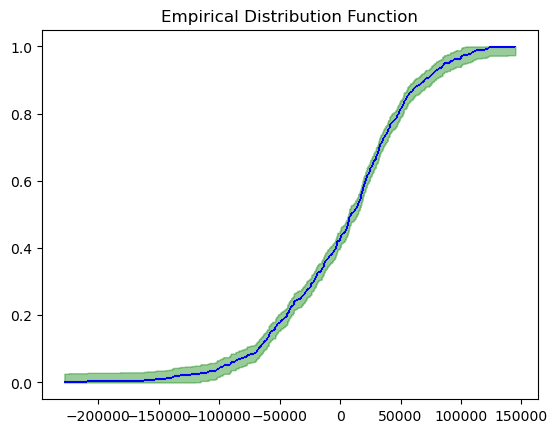

In [127]:
# Part 4

# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 99% confidence in this cell

from Utils import plotEDF, makeEDF
residual = predictions-problem2_y_test 
#n = len(residual)

# formula from wiki
#alpha = 0.01
#dkw_epsilon = np.sqrt( ( np.log(2/(alpha/2)) ) / (2*n) )

edf = makeEDF(residual)
#confidence_bands = (residual - dkw_epsilon, residual + dkw_epsilon)


plotEDF(edf,points_at_jump=False,confidence_band=True, alpha=0.01) 
# the utils.py comment was confusing. But, when confidence_band being True, should output DKW confidence bands



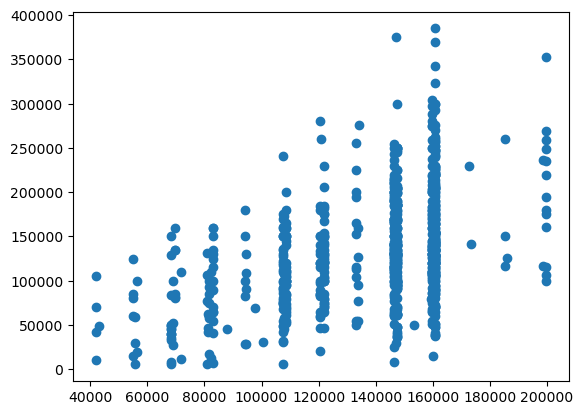

In [134]:
# Part 5

# Write the code below to produce the scatter plot for part 5
import matplotlib.pyplot as plt

# predictions are over the x_test
plt.scatter(predictions,problem2_y_test)
#plt.scatter(problem2_y_test,problem2_y_test)


## Part 6

Double click this cell to enter edit mode and write your answer for part 6 below this line.

#### Discussion on the value of the MARE
the mean absolute relative error was around 0.577... 
I think that's too high. I'd say that a "good" mare would be around maybe 0.00 to 0.25 since it supposed to fit the line but, should still be general.
It's also worth considering how data looks geometrically.

#### Discussion on the predicted vs. true scatterplot
It's very.. interesting. If we had a "good" model, the predicted values would be closer to the orange (true) line. 
There is likely a large data gap between employees that make ALOT of money, and that's why the predicted values make a hard stop on the x-axis. 
The model is biased for employees that earn less, due to the skewedness of the training data most likely. 
To explain why there is vertical lines in the predicted values, I believe its because in salaries.csv, salary_in_usd is often divisibibe by 10. May explain the evenly-spaced jumps n the x-axis.


#### Discussion
I'm suspecting that some of the features used aren't very related to predicting salary_in_usd. Also, work_year is extremely "2023" heavy, and employment_type is almost exclusively "1". So.. what's the point of having employment_type. 
So for the next time, i'd drop "work_type" and "work_year". 
Remote ratio and the other features seem to be varied enough. It would be interesting to see the plot for that. 


---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following two Markov chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>

**Answer each question for all chains:**

1. [2p] What is the transition matrix?
2. [1p] Is the Markov chain irreducible?
3. [4p] Is the Markov chain aperiodic? What is the period for each state? Hint: Recall our definition of period; Let $\mathbb{T}:=\{t \in \mathbb{N}: P^t(x,x) > 0\}$ and the greatest common divisor of $\mathbb{T}$ is the period.
4. [2p] Being in state $A$ at time $0$ what is the probability of being in state $B$ at time $5$ (after $5$ steps)
5. [4p] Define $T$ as the first time being in state $D$ starting in state $A$. That is, if $X_0,X_1,\ldots$ is the Markov chain then define for $X_0 = "A"$
$$
    T(\omega) = \inf_{t \in \mathbb{N}} \{t: X_t(\omega) = "D"\}
$$
where the infimum over the empty set is $\infty$. Calculate $\mathbb{P}(T = 1)$, $\mathbb{P}(T = 2)$, $\mathbb{P}(T = 3)$, $\mathbb{P}(T = 4)$, $\mathbb{P}(T = 5)$, $\mathbb{P}(T = \infty)$.

In [82]:
# PART 1

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A    = np.array([[0,0.2,0,0.8],[0,0,1,0],[0,1,0,0],[0.5,0,0.5,0]])
problem3_B    = np.array([[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0.5,0,0.5,0,0],[0,0,0.5,0,0.5,0],[0,0,0,0,0,1],[0.5,0,0,0,0.5,0]])

print(problem3_A.shape)
print(problem3_B.shape)

(4, 4)
(6, 6)


In [ ]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False

# irreducible : its possible to get from one state to any other. i.e, all states "communicate"
problem3_A_irreducible = False
problem3_B_irreducible = True


In [85]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

problem3_A_is_aperiodic = False # fixed cycle, e.g, B<->C
problem3_B_is_aperiodic = True # no fixed cycle  

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

#Definition 7.21 (Return times and period). Let T(x) := {t ∈ N : P
#t
#(x, x) >
#0} be the set of possible return times to the starting state x. The period
#of state x is defined to be gcd(T(x)),

# state D is aperiodic, period of 1. theres no way to return to it. All other states only have the possible return times of 2.
# (B<->C) is a fixed period, returning is always 2, and A<->A is only possible for A<->D, so A has period of 2. 
problem3_A_periods = np.array([2,2,2,1]) 
problem3_B_periods = np.array([1,1,1,1,1,1]) # since B is aperiodic, by definition, every period is 1. 


1


In [97]:
# PART 4

# Part 1
Transition_matrix_A = problem3_A
Transition_matrix_B = problem3_B

start_vector_A = np.array([1,0,0,0]) 
start_vector_B = np.array([1,0,0,0,0,0]) 

probabilitesA = start_vector_A @ (Transition_matrix_A @ Transition_matrix_A @ Transition_matrix_A @  Transition_matrix_A @ Transition_matrix_A)
probabilitesB = start_vector_B @ (Transition_matrix_B @ Transition_matrix_B @ Transition_matrix_B @  Transition_matrix_B @ Transition_matrix_B)

# Answer the following with the probability of being in state B at time 5 for the two problems
problem3_A_PB5 = probabilitesA[1]
problem3_B_PB5 = probabilitesB[1]

print(problem3_A_PB5)
print(problem3_B_PB5) 

0.8720000000000002
0.375


In [135]:
# PART 5


# first hitting times

# P_first[n] = probability that downtown was visited first on step n+1
def firsttimeprobsA(T):
    P_first = [0] * 30
    P = problem3_A
    p0 = start_vector_A
    # Fill in P_first recursively
    for i in range(30):
        p1 = p0*P # From the previous step, calculate the probabilities of transisition
        P_first[i] = p1[0,0] # Save the transition probability of downtown
        p0 = p1 # Set next step if the recursion
        p0[0,0] = 0 # Subtract the probability of reaching downtown from downtown in next step
    return P_first


def firsttimeprobsB(T):
    P_first = [0] * 30
    P = problem3_B
    p0 = start_vector_B
    # Fill in P_first recursively
    for i in range(30):
        p1 = p0*P # From the previous step, calculate the probabilities of transisition
        P_first[i] = p1[0,0] # Save the transition probability of downtown
        p0 = p1 # Set next step if the recursion
        p0[0,0] = 0 # Subtract the probability of reaching downtown from downtown in next step 
    return P_first

#probabilitesA = start_vector_A @ (Transition_matrix_A @ Transition_matrix_A @ Transition_matrix_A @  Transition_matrix_A @ Transition_matrix_A)
#probabilitesB = start_vector_B @ (Transition_matrix_B @ Transition_matrix_B @ Transition_matrix_B @  Transition_matrix_B @ Transition_matrix_B)

# i have 8 minutes to write this cell


# Answer the following probabilities for T=1,2,3,4,5 and infinity
problem3_A_PT1 = firsttimeprobsA(1)
problem3_A_PT2 = firsttimeprobsA(2)
problem3_A_PT3 = firsttimeprobsA(3)
problem3_A_PT4 = firsttimeprobsA(4)
problem3_A_PT5 = firsttimeprobsA(5)
problem3_A_PT_inf = firsttimeprobsA(np.inf)

problem3_B_PT1 = firsttimeprobsB(1)
problem3_B_PT2 = firsttimeprobsB(2)
problem3_B_PT3 = firsttimeprobsB(3)
problem3_B_PT4 = firsttimeprobsB(4)
problem3_B_PT5 = firsttimeprobsB(5)
problem3_B_PT_inf = firsttimeprobsB(np.inf)

SyntaxError: expected ':' (896058952.py, line 7)